## Question 1

*(a) Describe how to estimate a linear regression model using (i) maximum likelihood, and (ii) maximum a posteriori (MAP) estimation. (Note: We did not cover how to apply the two methods for linear regression in class. You should try to follow their standard procedures and make the necessary assumptions.)*

Suppose that we have an IID sample $\left(y_i, X_i\right)_{i=1}^n$ from some population such that there is no perfect multicollinearity in $X$. Consider the following linear regression model

$$y_i = X_i \beta + \epsilon_i, \quad \mathbb{E} \left[\epsilon_i \mid X_i \right] = 0$$

**Maximum Likelihood:**

To estimate the parameters of this model using maximum likelihood, we need to specify a distribution for $y_i$ and select the parameters that maximize the likelihood of the observatiosn.

For example, suppose that $y_i | X_i \sim N(X_i \beta,\sigma^2)$. Then, we can construct the log-likelihood function as

\begin{eqnarray}
L(\beta) & = & \ln \left( \prod_{i=1}^n \frac{1}{\sqrt{2\pi\sigma^2}} \exp \left( -
\frac{1}{2} \frac{(y_i - X_i \beta)^2}{\sigma^2} \right) \right) \\
&= & -N \ln(\sqrt{2\pi\sigma^2}) - \frac{1}{2\sigma^2} \sum (y_i - X_i\beta)^2
\end{eqnarray}

The maximum likelihood estimator satisfies

$$\widehat{\beta}_{MLE} = \arg \max L(\beta)$$

The first-order necessary condition associated with this problem is:

$$-\sum(y_i - X_i \beta)^2 = 0$$

Therefore:

$$\widehat{\beta}_{MLE} = \left( \sum X_i'X_i \right)^{-1} \left( \sum X_i'y_i \right)$$

**Maximum A Posteriori (MAP):**

With MAP, we specify a prior distribution for the parameters in addition to a sampling distribution for the observations. We then construct the posterior distribution for the parameters, and select the value that maximizes it.

Continuing with the previous example, suppose also that $\beta \sim N \left(m_0, v_0^2\right)$.

According to Bayes’ rule, the posterior satisfies:

$$f\left(\beta \mid \left(y_i, X_i\right)_{i=1}^n \right) \propto \frac{1}{\sqrt{2\pi v_0^2 (2\pi\sigma^2)^N}}
\exp \left( - \frac{1}{2} \left(\frac{(\beta - m_0)^2}{v_0^2}\right) - \frac{1}{2\sigma^2}
\sum_{i=1}^N (y_i - x_i'\beta)^2 \right)$$

The MAP estimate satisfies

$$\widehat{\beta}_{MAP} = \arg \max f\left(\beta \mid \left(y_i, X_i\right)_{i=1}^n \right) $$

The first-order necessary condition is:

$$- \left(\frac{(\beta - m_0)^2}{v_0^2}\right) -
\frac{1}{\sigma^2} \sum (y_i - x_i'\beta)^2 = 0 $$

Therefore:

$$\widehat{\beta}_{MAP} = \left( \frac{I}{v_0^2} + \sum \frac{x_i'x_i}{\sigma^2}
\right)^{-1} \left( \frac{m_0}{v_0^2} + \sum \frac{x_i'y_i}{\sigma^2} \right)$$


*(b) True or false: If the data are positively autocorrelated, the efficient GMM standard error that does not correct for the autocorrelation will be too small. With negative autocorrelation, the standard error will be too big.*

True.

Positive autocorrelation reduces the effective sample size, and therefore, increases the variance. As such, using an estimator that assumes no autocorrelation will lead to standard error estimates that are too small. To see this, consider the case where observations are perfectly positively correlated. In this case, all observations are equal, meaning that the sample size is effectively 1

Similar logic applies to the case with negative autocorrelation.

## Question 2

*You work for the asset management department
of a large bank. You have the historical returns of N portfolio managers over the same time period, $x_{t}^n$, with $n = 1, \cdots ,N $ and $t = 1, \cdots , T$. You want to see whether all of the managers produce the same average returns.*

*(a) State the null hypothesis of your test.*

Let $\mu_i = \mathbb{E} \left[x_{t}^i \right]$ and assume that $\mu_i < \infty$ for $i=1,2$. We can formulate the null hypothesis as

$$H_0 : \begin{bmatrix} \mu_2 - \mu_1 \\ \vdots \\ \mu_N - \mu_1 \end{bmatrix} = 0$$

*(b) Assume that returns are independent and identically distributed over time but potentially correlated contemporaneously. Derive the estimator of the average returns for the N strategies, $\widehat{\mu}$ (this is an N ×1 vector, with $\widehat{\mu}_i$ being the average return estimator for manager $i$). Derive also the asymptotic covariance matrix $\widehat{\Omega}$ for the estimated mean vector.*

*(c) Argue that the estimator $\widehat{μ}$ has multivariate normal distribution asymptotically.*

Let $x_t = \begin{bmatrix} x_{1}^1 \\ \vdots \\ x_{2}^N \end{bmatrix}$. We can estimate $\mu$ using

$$\widehat{\mu} = \frac{1}{T} \sum_{t=1}^T x_t $$

To argue that $\widehat{\mu}$ has a multivariate normal distribution asymptotically, we can use the multivariate central limit theorem. In particular, observe that $x_t$ is an IID random vector and let $\Omega$ denote its (well-defined) covariance matrix. Then, the multivariate CLT tells us that

$$\frac{1}{\sqrt{T}} \left(\widehat{\mu} - \mu\right) \sim^a N \left(0, \Omega\right)$$

The asymptotic covariance matrix can be estimated using

$$\widehat{\Omega} = \frac{1}{T} \sum_{t-1}^T \left(x_t - \widehat{\mu}\right) \left(x_t - \widehat{\mu}\right)'$$

*(d) Define $\widehat{\delta}_k = \widehat{\mu}_k − \widehat{\mu}_1$, $k = 2, · · · ,N$. Argue that the asymptotic distribution of the vector $\widehat{\delta} = (\widehat{\delta}_2, ..., \widehat{δ}_N)′$ is multivariate normal. What is the mean and var-cov matrix of this distribution under the null hypothesis? Derive the var-cov matrix of $\widehat{δ}$ from $\widehat{\Omega}$, and explain how to estimate it directly from return data $x^n_t$.*

Define the function $g \left(\mu\right) = \begin{bmatrix} \mu_2 - \mu_1 \\
\vdots \\
\mu_N - \mu_1 \end{bmatrix}$. Observe that $g$ is a continuous function. Therefore, by the Delta method, we have

$$\frac{1}{\sqrt{T}} \left(g\left(\widehat{\mu}\right) - g\left(\mu\right)\right) \sim^a N \left(0, \nabla g \left(\mu\right)' \Omega \nabla g \left(\mu\right) \right)$$

Equivalently,

$$\frac{1}{\sqrt{T}} \left(\widehat{\delta} - \delta\right) \sim^a N \left(0, \nabla g \left(\mu\right)' \Omega \nabla g \left(\mu\right) \right)$$

as required.

Under the null hypothesis, $\delta = 0$.

The asymptotic variance can be estimated as

\begin{eqnarray}
\widehat{V} & = & \nabla g \left(\widehat{\mu}\right)' \widehat{\Omega} \nabla g \left(\widehat{\mu}\right)
\end{eqnarray}

*(e) Denote the covariance matrix of the distribution of $\widehat{\delta}$ in (2d) by $V$. Argue that the test statistic $W = \widehat{\delta}' V^{-1} \widehat{\delta}$ is distributed as $\chi^2(N − 1)$.*

First, note that by the delta method, $V^{-\frac{1}{2}} \widehat{\delta} \sim^a N \left(0, I, \right)$.

Besides, $W$ can be expressed a continuous function of $V^{-\frac{1}{2}} \widehat{\delta}$, and therefore, the delta method implies that $W$ is asymptotically distributed as the sum of the square of $N-1$ standard normal random variables. In other words, it has a $\chi^2(N − 1)$ distribution.

*(f) Using the $\chi^2$ distribution, construct a test of the null hypothesis with 5% size. Your test should rely on the statistic W in (2e).*

For any $\alpha \geq 0$, let $c_{\alpha}$ denote the constant that satisfies $\alpha = \mathbb{P} \left(\chi ^ 2 \left(1\right) \geq c_{\alpha} \right)$. We can test the null hypothesis at the 5% significance level as follows: Reject if and only if $\boldsymbol{1} \left\{W \geq c_{5\%}\right\} = 1$.

*(g) How would your answer above change if you had ignored the fact that returns are correlated contemporaneously?*

If we modeled returns as IID instead of correlated contemporaneously, we would have $\Omega = \sigma^2 I$ where $\sigma^2$ denotes the variance of returns.

## Question 3

*You run a large university endowment that invests with
outside portfolio managers. Two final candidates have been presented to you. The PMs’ track records from 2005 to 2019 are included in the spreadsheet “pm.xlsx.” You might also need the data for monthly market excess returns, returns for the SMB and HML factors, and one-month Treasury bill rates from Ken French’s website (https://goo.gl/xtDApU). Please answer the following questions.*

*(a) Summarize the performances of the two managers:*

- *Make scatter plots of the managers’ monthly excess returns against the market excess returns.*
- *Make a boxplot of the two managers’ monthly returns and comment on the differences. If you notice any outliers, discuss how you would treat them.*
- *Report the mean and standard deviation of monthly returns; compute the Sharpe ratio, information ratio, and maximum drawdown. For the information ratio, use market portfolio as the benchmark.*

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from io import BytesIO
import zipfile
from urllib.request import urlopen

In [ ]:
url_pm = 'https://raw.githubusercontent.com/museaoide/15450_457/main/PM.csv'
df_pm = (pd.read_csv(url_pm,
                    index_col=0,
                    parse_dates=True,
                    date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))
         .apply(lambda x: x / 100)
         )

url_ff = urlopen("http://mba.tuck.dartmouth.edu/pages/faculty/ken.french/ftp/F-F_Research_Data_Factors_CSV.zip")
zfile = zipfile.ZipFile(BytesIO(url_ff.read()))
df_ff = (pd.read_csv(zfile.open('F-F_Research_Data_Factors.CSV'),
                     header = 0,
                     names = ['date','exmkt','smb','hml','rf'],
                     skiprows=3,
                     nrows=1158,
                     index_col=0,
                     parse_dates=True,
                     date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))
         .apply(lambda x: x / 100)
         )

In [ ]:
df = df_pm.merge(df_ff, left_index=True, right_index=True)
df['expm1'] = df.PM1 - df.rf
df['expm2'] = df.PM2 - df.rf

<Axes: xlabel='expm1', ylabel='exmkt'>

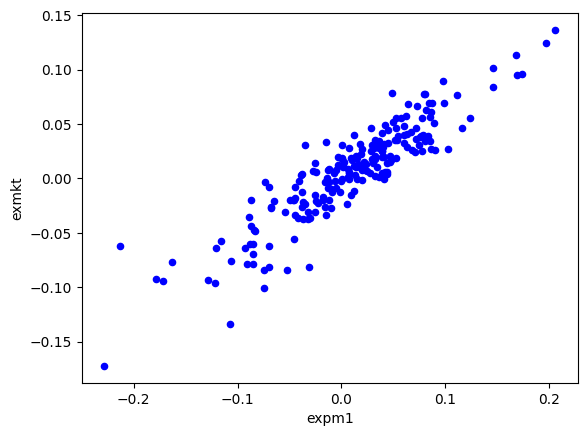

In [ ]:
df.plot.scatter('expm1', 'exmkt', color='blue')

<Axes: xlabel='expm2', ylabel='exmkt'>

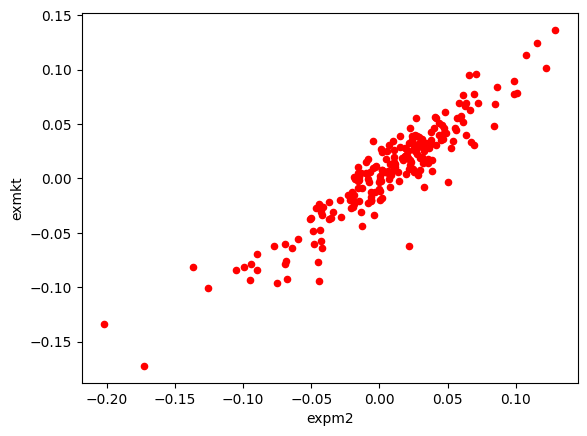

In [ ]:
df.plot.scatter('expm2', 'exmkt', color='red')

<Axes: >

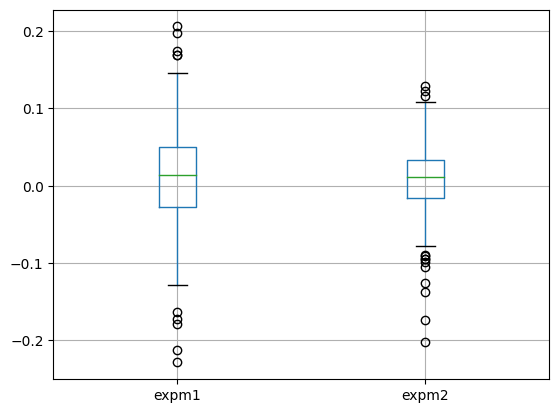

In [ ]:
df[['expm1','expm2']].boxplot()

In [ ]:
def compute_drawdown(returns):
    """
    Calculate the drawdown of a series of returns.

    Parameters:
    - returns (array-like): The series of returns for which the drawdown is to
                            be computed.

    Returns:
    - array: The drawdown series which is the ratio of cumulative returns to
             the running maximum.
    """
    cum_returns = np.multiply.accumulate(1 + returns)
    run_max = np.maximum.accumulate(cum_returns)
    drawdown = cum_returns / run_max

    return drawdown

def compute_performance(df, exp_col):
    """
    Compute various performance metrics for a given set of returns in a
    DataFrame.

    Parameters:
    - df (DataFrame): The DataFrame containing the data.
    - exp_col (str): The column name in the DataFrame for which the metrics
                     are computed.

    Returns:
    - dict: A dictionary containing performance metrics including mean return,
            standard deviation, Sharpe Ratio, Information Ratio, and Maximum
            Drawdown.
    """
    returns = df[exp_col] + df['rf']
    tracking_error = df[exp_col] - df['exmkt']

    return {
        'Mean': returns.mean(),
        'Std Dev': returns.std(),
        'Sharpe Ratio': df[exp_col].mean() / returns.std(),
        'Info Ratio': tracking_error.mean() / tracking_error.std(),
        'Max Drawdown': (compute_drawdown(returns).min() - 1) * 100
    }

def print_performance(manager_number, performance):
    """
    Print the performance metrics for a manager in a formatted manner.

    Parameters:
    - manager_number (int): The identifier number of the manager.
    - performance (dict): A dictionary containing the performance metrics to
                          be printed.
    """
    print(f"Manager {manager_number}:")
    for metric, value in performance.items():
        print(f"{metric}: {value:.4f}")
    print("")


performance_1 = compute_performance(df, 'expm1')
performance_2 = compute_performance(df, 'expm2')

print_performance(1, performance_1)
print_performance(2, performance_2)

Manager 1:
Mean: 0.0110
Std Dev: 0.0676
Sharpe Ratio: 0.1490
Info Ratio: 0.0900
Max Drawdown: -56.1173

Manager 2:
Mean: 0.0080
Std Dev: 0.0478
Sharpe Ratio: 0.1478
Info Ratio: -0.0043
Max Drawdown: -53.5017



*(b) For each manager, is there any evidence for the ability to outperform the market? Is there any evidence of ability to generate alpha (relative to the Fama-French 3-factor model)? What are their exposures to size and value factors?*

In [ ]:
# Market
X = sm.add_constant(df.exmkt)
results = [sm.OLS(df[expm], X).fit() for expm in ["expm1", "expm2"]]
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  expm1   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     1006.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           8.08e-83
Time:                        04:59:25   Log-Likelihood:                 463.50
No. Observations:                 216   AIC:                            -923.0
Df Residuals:                     214   BIC:                            -916.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.002      0.208      0.836      -0.003       0.004
exmkt          1.3544      0.043     31.711      0.000       1.270       1.439
==============================================================================
Omnibus:                       16.652   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               29.745
Skew:                          -0.410   Prob(JB):                     3.48e-07
Kurtosis:                       4.623   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  expm2   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1407.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           4.60e-96
Time:                        04:59:25   Log-Likelihood:                 569.21
No. Observations:                 216   AIC:                            -1134.
Df Residuals:                     214   BIC:                            -1128.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.239e-05      0.001      0.044      0.965      -0.002       0.002
exmkt          0.9822      0.026     37.515      0.000       0.931       1.034
==============================================================================
Omnibus:                       27.754   Durbin-Watson:                   1.698
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.072
Skew:                           0.385   Prob(JB):                     1.53e-23
Kurtosis:                       6.329   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# Fama-French 3 factor model
X = sm.add_constant(df[["exmkt", "hml", "smb"]])
results = [sm.OLS(df[expm], X).fit() for expm in ["expm1", "expm2"]]
results[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  expm1   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.994
Method:                 Least Squares   F-statistic:                 1.096e+04
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          3.64e-232
Time:                        04:59:25   Log-Likelihood:                 821.02
No. Observations:                 216   AIC:                            -1634.
Df Residuals:                     212   BIC:                            -1621.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.316      0.190      -0.000       0.001
exmkt          1.2868      0.009    145.771      0.000       1.269       1.304
hml           -0.6754      0.012    -56.903      0.000      -0.699      -0.652
smb            0.8094      0.016     49.213      0.000       0.777       0.842
==============================================================================
Omnibus:                        1.522   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.467   Jarque-Bera (JB):                1.335
Skew:                          -0.191   Prob(JB):                        0.513
Kurtosis:                       3.048   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
results[1].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  expm2   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.968
Method:                 Least Squares   F-statistic:                     2164.
Date:                Wed, 10 Jan 2024   Prob (F-statistic):          1.14e-158
Time:                        04:59:25   Log-Likelihood:                 723.53
No. Observations:                 216   AIC:                            -1439.
Df Residuals:                     212   BIC:                            -1426.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.001      0.818      0.415      -0.001       0.002
exmkt          0.9439      0.014     68.086      0.000       0.917       0.971
hml            0.4791      0.019     25.704      0.000       0.442       0.516
smb           -0.0979      0.026     -3.789      0.000      -0.149      -0.047
==============================================================================
Omnibus:                        4.609   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                4.235
Skew:                           0.324   Prob(JB):                        0.120
Kurtosis:                       3.227   Cond. No.                         45.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

None of the managers appear to generate significant alpha.

*(c) Which PM is better at beating the market? Which can generate a higher Sharpe ratio? Which can generate a higher information ratio based on the 3-factor model (defined as $\frac{\alpha_i}{\sigma \left(\epsilon_{i,t}\right)}$ from the model above)? Answer these questions through formal statistical tests.*

Recall that the CAPM is

$$R_{i,t}^e = \alpha_i + \beta_i R_{m,t}^e + \nu_{i,t}$$

where $\nu_{i,t}$ denotes an error term.

We are interested in testing the hypothesis

$$H_0 : \alpha_1 - \alpha_2 = 0$$

Notice that

\begin{eqnarray}
R_{1,t}^e - R_{2,t}^e & = & \alpha_1 - \alpha_2 + \left(\beta_1 - \beta_2 \right) R_{m,t}^e + \nu_{1,t} - \nu_{2,t} \\
& \equiv & \widetilde{\alpha} + \widetilde{\beta} R_{m,t}^e + \widetilde{\nu}_{t}
\end{eqnarray}

Hence, we can test our hypothesis by testing

$$H_0 : \widetilde{\alpha} = 0$$

In [ ]:
X = sm.add_constant(df.exmkt)
y = df.PM1 - df.PM2
sm.OLS(y, X).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     33.61
Date:                Wed, 10 Jan 2024   Prob (F-statistic):           2.40e-08
Time:                        04:59:25   Log-Likelihood:                 375.47
No. Observations:                 216   AIC:                            -746.9
Df Residuals:                     214   BIC:                            -740.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.003      0.120      0.904      -0.005       0.006
exmkt          0.3722      0.064      5.797      0.000       0.246       0.499
==============================================================================
Omnibus:                       30.631   Durbin-Watson:                   1.678
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.105
Skew:                          -0.529   Prob(JB):                     8.20e-22
Kurtosis:                       6.110   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We don't find evidence that a manager is better than the other
at beating the market.

To test whether a manager can generate a higher Sharpe ratio than the other, we formulate the following hypothesis:

$$H_0 : \frac{\mu_1}{\sigma_1} - \frac{\mu_2}{\sigma_2} = 0$$

To test this hypothesis, we can use GMM. Let $R_{i,t} = R_{f, t} + R_{i,t}^e$ where $R_{f,t}$ denotes the risk free rate.Consider the following moment function:

$$f\left(R_t, \theta\right) = \begin{bmatrix} R_{1,t} - \mu_1 \\ R_{2,t} - \mu_2 \\
\left(R_{1,t} - \mu_1 \right) ^ 2 - \sigma_1^2 \\
\left(R_{2,t} - \mu_2 \right) ^ 2 - \sigma_2^2 \end{bmatrix}$$

where $R_t = \begin{bmatrix} R_{1, t} \\ R_{2,t} \end{bmatrix}$ and $\theta = \left(\mu_1, \mu_2, \sigma_1, \sigma_2\right)$.

In class, we saw that

$$\sqrt{n} \left(\widehat{\theta}_{GMM} - \theta \right) \sim^a N \left(0, \left(G' \Omega^{-1} G \right)^{-1} \right) $$

when the weighting matrix is $\Omega^{-1}$ where

\begin{eqnarray}
  \Omega & = & \mathbb{E} \left[f\left(R_t, \theta\right) f\left(R_t, \theta\right)' \right] \\
  G & = & \mathbb{E} \left[\nabla_{\theta} f\left(R_t, \theta\right) \right]
\end{eqnarray}

where $\mathbb{E} \left[\nabla_{\theta} f\left(R_t, \theta\right) \right] = \begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -2 \sigma_1 & 0 \\
0 & 0 & 0 & -2 \sigma_2 \end{bmatrix}$.

Notice that we can compute $\theta$ analytically in this case. Besides, we can estimate $\Omega$ and $G$ by replacing expectations with their empirical counterpart and evaluating functions at the estimated parameters.

Finally, notice that $g\left(\theta\right) = \frac{\mu_1}{\sigma_1} - \frac{\mu_2}{\sigma_2}$ is a continuous function, and therefore, we can use the Delta method to derive the variance of this quantity. In particular,

$$\sqrt{n} \left(g\left(\widehat{\theta}_{GMM}\right) - g\left(\theta \right) \right) \sim^a N \left(0, \nabla_{\theta} g \left(\theta\right)' \left(G' \Omega^{-1} G \right)^{-1} \nabla_{\theta} g \left(\theta\right)\right)  $$

where $\nabla_{\theta} g \left(\theta\right) = \begin{bmatrix} \frac{1}{\sigma_1} \\
-\frac{1}{\sigma_2} \\
-\frac{\mu_1}{\sigma_1^2} \\
\frac{\mu_2}{\sigma_2^2} \end{bmatrix} $.

$\mathbb{E} \left[\nabla_{\theta} f\left(R_t, \theta\right) \right] = \begin{bmatrix} -1 & 0 & 0 & 0 \\ 0 & -1 & 0 & 0 \\ 0 & 0 & -2 \sigma_1 & 0 \\
0 & 0 & 0 & -2 \sigma_2 \end{bmatrix}$.

In [ ]:
def f(R, theta):
  R_1, R_2 = R
  mu_1, mu_2, sigma_1, sigma_2 = theta

  resid = np.array([R_1 - mu_1,
                    R_2 - mu_2,
                    (R_1 - mu_1) ** 2 - sigma_1 ** 2,
                    (R_2 - mu_2) ** 2 - sigma_2 ** 2])

  return resid


theta_hat = np.array([
    df.expm1.mean(),
    df.expm2.mean(),
    df.expm1.std(),
    df.expm2.std()
])

mu_1_hat, mu_2_hat, sigma_1_hat, sigma_2_hat = theta_hat

G_hat = np.array([[-1, 0, 0, 0],
                  [0, -1, 0, 0],
                  [0, 0, -2 * sigma_1_hat, 0],
                  [0, 0, 0, -2 * sigma_2_hat]])

f_hat = df[['expm1', 'expm2']].apply(lambda R: f(R, theta_hat),
                                     axis=1,
                                     result_type='expand').values
T = len(f_hat)
Omega_hat = f_hat.T @ f_hat / T

nabla_g_hat = np.array([[1 / sigma_1_hat],
                        [-1 / sigma_2_hat],
                        [-mu_1_hat / sigma_1_hat ** 2],
                        [mu_2_hat / sigma_2_hat ** 2]])

sr_diff = mu_1_hat / sigma_1_hat - mu_2_hat / sigma_2_hat
var_sr_diff = 1 / T * nabla_g_hat.T @ np.linalg.inv(G_hat.T @ np.linalg.inv(Omega_hat) @ G_hat) @ nabla_g_hat
se_sr_diff = np.sqrt(var_sr_diff)
tstat = sr_diff / se_sr_diff

print(f"Sharpe ratio difference: {sr_diff}")
print(f"t-stat for difference in Sharpe ratios: {tstat.item()}")

Sharpe ratio difference: 0.0011979616396915749
t-stat for difference in Sharpe ratios: 0.022219304934889127


Again, we don't find evidence that a manager can generate a higher Sharpe ratio than the other.

We can use the same methodology for the information ratio. In that case, the hypothesis is

$$H_0 : \frac{\mu_1}{\sigma \left(\epsilon_{1,t}\right)} - \frac{\mu_2}{\sigma \left(\epsilon_{2,t}\right)}= 0 $$

Let $X_t = \left(R_t, W_t'\right)$, $W_t = \left(1, R_{m,t}^e, R_{hml, t}, R_{smb, t} \right)'$, and $\theta = \left(\alpha_1, \alpha_2, \beta_1, \beta_2, \gamma_1, \gamma_2, \delta_1, \delta_2, \sigma_1, \sigma_2 \right)$.

The moment function is

$$f\left(X_t, \theta\right) = \begin{bmatrix} W_t \epsilon_{1, t} \\
W_t \epsilon_{2, t} \\
\epsilon_{1, t} ^ 2 - \sigma_1^2 \\
\epsilon_{2, t} ^ 2 - \sigma_2^2 \end{bmatrix}$$

Besides,

$$\mathbb{E} \left[\nabla_{\theta} f\left(R_t, \theta\right) \right] = \begin{bmatrix} -\mathbb{E} \left[W_t W_t' \right] & 0 & 0 & 0 \\ 0 & -\mathbb{E} \left[W_t W_t' \right] & 0 & 0 \\ 0 & 0 & -2 \sigma_1 & 0 \\
0 & 0 & 0 & -2 \sigma_2 \end{bmatrix}$$


The function $\nabla_{\theta} g \left(\theta\right)$ is

$$\nabla_{\theta} g \left(\theta\right) = \begin{pmatrix} \frac{1}{\sigma_1} \\ \frac{-1}{\sigma_2} \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ 0 \\ \frac{-\alpha_1}{\sigma_1^2} \\ \frac{\alpha_2}{\sigma^2_2} \end{pmatrix}$$

In [ ]:
def f(X_t, theta):
  R_1, R_2, const, R_m, R_hml, R_smb  = X_t
  W = np.array([const, R_m, R_hml, R_smb])
  alpha_1, alpha_2, beta_1, beta_2, gamma_1, gamma_2, delta_1, delta_2, sigma_1, sigma_2 = theta
  epsilon_1 = R_1 - alpha_1 - beta_1 * R_m - gamma_1 * R_hml - delta_1 * R_smb
  epsilon_2 = R_2 - alpha_2 - beta_2 * R_m - gamma_2 * R_hml - delta_2 * R_smb

  resid = np.array([*(W * epsilon_1),
                    *(W * epsilon_2),
                    epsilon_1 ** 2 - sigma_1 ** 2,
                    epsilon_2 ** 2 - sigma_2 ** 2])

  return resid


W = sm.add_constant(df[["exmkt", "hml", "smb"]])
result_1 = sm.OLS(df.PM1, W).fit()
result_2 = sm.OLS(df.PM2, W).fit()

alpha_1_hat, beta_1_hat, gamma_1_hat, delta_1_hat = result_1.params
alpha_2_hat, beta_2_hat, gamma_2_hat, delta_2_hat = result_2.params
sigma_1_hat = np.sqrt(np.var(result_1.resid))
sigma_2_hat = np.sqrt(np.var(result_2.resid))

theta_hat = np.array([
    alpha_1_hat,
    alpha_2_hat,
    beta_1_hat,
    beta_2_hat,
    gamma_1_hat,
    gamma_2_hat,
    delta_1_hat,
    delta_2_hat,
    sigma_1_hat,
    sigma_2_hat,
])


X = pd.concat([df[['PM1', 'PM2']], W], axis=1)
f_hat = X.apply(lambda X_t: f(X_t, theta_hat), axis=1, result_type='expand').values
T = len(f_hat)
Omega_hat = f_hat.T @ f_hat / T

EWWT = (W.T @ W).values / T
G_hat = np.block([[EWWT, np.zeros((4, 4)), np.zeros((4, 2))],
                  [np.zeros((4, 4)), EWWT, np.zeros((4, 2))],
                  [np.zeros((1, 4)), np.zeros((1, 4)), np.array([-2 * sigma_1_hat, 0])],
                  [np.zeros((1, 4)), np.zeros((1, 4)), np.array([0, -2 * sigma_2_hat])]])

nabla_g_hat = np.array([[1 / sigma_1_hat],
                        [0],
                        [0],
                        [0],
                        [-1 / sigma_2_hat],
                        [0],
                        [0],
                        [0],
                        [-alpha_1_hat / sigma_1_hat ** 2],
                        [alpha_2_hat / sigma_2_hat ** 2]])


ir_diff = alpha_1_hat / sigma_1_hat - alpha_2_hat / sigma_2_hat
var_ir_diff = 1 / T * nabla_g_hat.T @ np.linalg.inv(G_hat.T @ np.linalg.inv(Omega_hat) @ G_hat) @ nabla_g_hat
se_ir_diff = np.sqrt(var_ir_diff)
tstat = ir_diff / se_ir_diff

print(f"Information ratio difference: {ir_diff}")
print(f"t-stat for difference in information ratios: {tstat.item()}")


Information ratio difference: 0.10483533191590286
t-stat for difference in information ratios: 1.0549260795056936


We don't find evidence of a difference in information ratios between the two managers.

## Question 4

*After learning about Bernard and Thomas (1985), you are wondering whether your own hedge fund can build a trading strategy based on the PEAD. You thought of a different way to identify stocks with positive and negative earnings surprises. Instead of using accounting data, you will sort stocks based on the standardized excess return on the day after the announcement (earnings are released after the market close):*

$$s_{i,t} = \frac{R_{i,t} - R_{m,t}}{\sigma_{i,t}}$$

*where $R_{i,t}$ is stock $i$’s return on day $t$, $R_{m,t}$ is the market return, and $\sigma_{i,t}$ is the volatility of stock $i$’s excess return (which can be estimated using past returns, say the past 60 days).*

*Data: You can download the data at https://goo.gl/Ahxa9A, which contains two files. The first is PEAD.csv, which contains historical daily return data for the 1000 largest stocks (based on market cap at the end of 2010). The field “cap” is the market capitalization of the company. The field ”ann” is a dummy variable that is equal to 1 on the day after the company’s earnings announcement and zero otherwise. The second file is market.csv, which contains the daily market return from the same sample period.*

*Design an event study to test the null hypothesis that “stocks with the most positive (negative) standardized excess returns on the day after the announcement have the same average returns in the next 30 days.” You can define “most positive (negative)” as those stocks with $s_{i,t }> k$ ($s_{i,t} < −k$) for some $k$ (e.g., $k = 3$, but you can also experiment with the threshold).*

In [ ]:

import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm


def read_and_process_csv(url):
    df = pd.read_csv(url, on_bad_lines='skip', parse_dates=['DATE'],
                     date_parser=lambda x: pd.to_datetime(x, format='%Y%m%d'))
    return df


def preprocess_data(df):
    df['RET'] -= 0.01
    df['ret_m'] -= 0.01
    df['Rolling_STD'] = df.groupby('PERMNO')['RET'].transform(
        lambda x: x.rolling(60).std().shift(1)
    )
    return df


def market_model_abnormal(subdf, event_index, estimation_window, event_window):
    calibration_data = subdf[max(0, event_index - estimation_window - 1):event_index].copy()
    X = sm.add_constant(calibration_data['ret_m'])
    y = calibration_data['RET']
    model = sm.OLS(y, X).fit()

    prediction_data = subdf[event_index + 1:min(len(subdf), event_index + event_window + 1)].copy()
    prediction_data['expected_return'] = model.params['const'] + model.params['ret_m'] * prediction_data['ret_m']
    prediction_data['abnormal_return'] = prediction_data['RET'] - prediction_data['expected_return']

    return prediction_data['abnormal_return'].sum()


def compute_CAR(df, condition):
    estimation_window, event_window = 60, 30
    CAR_list = []

    for idx, row in df[df[condition] == 1].iterrows():
        stock_data = df[df['PERMNO'] == row['PERMNO']].reset_index(drop=True)
        event_index = stock_data.index[stock_data['DATE'] == row['DATE']][0]

        if event_index >= estimation_window and len(stock_data) - event_index - 1 >= event_window:
            CAR = market_model_abnormal(stock_data, event_index, estimation_window, event_window)
            CAR_list.append((row['DATE'], row['PERMNO'], CAR))

    return pd.DataFrame(CAR_list, columns=['DATE', 'PERMNO', 'CAR'])


def hypothesis_testing(df):
    N = df.shape[0]
    CARavg = df['CAR'].mean()
    variance = (1/N**2) * ((df['CAR'] - CARavg)**2).sum()
    SCAR = CARavg / (variance**0.5)
    p = (1 - stats.norm.cdf(SCAR))

    print(f"Test-statistic: {SCAR}, p-value: {p}, N={N}")


# Main execution
PEAD_URL = "https://www.dropbox.com/s/alaa2tp9rpzpz67/PEAD.csv?dl=1"
MKT_URL = "https://www.dropbox.com/s/xhcsmbreyon1qlv/market.csv?dl=1"

pead = read_and_process_csv(PEAD_URL)
mkt = read_and_process_csv(MKT_URL)

pead = pead.merge(mkt, on='DATE')
pead = preprocess_data(pead.drop_duplicates().dropna(subset=['RET', 'ret_m']))

k = 3.0
pead['most_pos'] = pead['ann'] * (((pead['RET'] - pead['ret_m']) / pead['Rolling_STD']) > k)
pead['most_neg'] = pead['ann'] * (((pead['RET'] - pead['ret_m']) / pead['Rolling_STD']) < -k)

mostpos_CAR = compute_CAR(pead, 'most_pos')
mostneg_CAR = compute_CAR(pead, 'most_neg')

hypothesis_testing(mostpos_CAR)
hypothesis_testing(mostneg_CAR)


Test-statistic: 3.6363920707955546, p-value: 0.00013824170452314544, N=2229
Test-statistic: 2.6379600550431275, p-value: 0.004170320292895324, N=2193
